In [1]:
%pip install 'polars[numpy,pyarrow,pandas]' fastexcel matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import polars as pl

In [3]:
df = pl.read_excel("UUCF Assignment Spreadsheet.xls")

In [ ]:
df

In [4]:
df = df.rename({"__UNNAMED__0": "Movie"})

In [5]:
df.sample(10)

Movie,1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""24: Kill Bill:…",3.0,5.0,null,4.0,3.0,3.0,null,0.5,3.5,5.0,4.0,4.0,4.0,5.0,5,5.0,0.5,4.0,4.0,4.5,4.0,5.0,null,5.0,3.0
"""36657: X-Men (…",null,4.5,null,null,4.0,null,4.5,5.0,4.0,5.0,null,4.0,3.5,null,4,3.5,null,3.0,4.0,3.5,null,null,null,3.0,4.0
"""194: Amelie (2…",null,5.0,null,null,null,null,null,1.0,null,5.0,null,null,null,5.0,4,null,4.0,3.0,4.0,5.0,2.5,4.0,4.5,4.5,null
"""602: Independe…",4.0,4.5,null,null,3.0,2.5,3.5,null,3.5,5.0,null,4.5,4.0,4.0,4,3.0,1.5,3.0,3.5,1.5,3.5,null,null,2.0,3.0
"""278: The Shaws…",null,5.0,4.5,5.0,3.0,null,null,1.0,5.0,3.5,5.0,null,3.5,4.5,null,null,4.0,3.0,4.5,0.5,4.5,null,5.0,4.0,null
"""2164: Stargate…",null,null,null,null,null,null,null,1.5,3.5,null,null,null,null,null,5,3.0,null,4.0,null,3.0,null,null,null,3.0,2.5
"""671: Harry Pot…",null,4.0,5.0,4.0,4.0,3.0,null,5.0,3.5,0.5,4.0,4.5,5.0,null,4,3.0,null,3.5,2.0,0.5,5.0,3.0,null,null,null
"""9741: Unbreaka…",null,null,null,null,null,null,null,3.5,3.5,null,null,null,2.5,null,null,null,null,null,null,3.0,3.0,null,null,null,null
"""585: Monsters …",null,5.0,5.0,null,3.5,4.0,5.0,1.0,3.5,null,null,3.5,null,5.0,null,null,3.5,4.0,4.0,3.5,null,null,null,null,5.0


### Complete the user-by-user correlations matrix.

In [6]:
# Polars dataframe doesnt correctly handles empty cells, resulting in all corr values being NaN.
# To fix that the dataframe is converted to pandas.
corr_matrix_df = pl.from_pandas(df.drop("Movie").to_pandas().corr())

display(corr_matrix_df)

1648,5136,918,2824,3867,860,3712,2968,3525,4323,3617,4360,2756,89,442,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.40298,-0.142206,0.51762,0.3002,0.480537,-0.312412,0.383348,0.092775,0.098191,-0.041734,0.264425,0.261268,0.46461,0.022308,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
0.40298,1.0,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,0.138548,0.152948,0.148882,0.562449,0.414438,0.488607,0.32812,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
-0.142206,0.118979,1.0,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,0.011316,-0.23166,0.148431,0.267029,0.304139,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
0.51762,0.057916,-0.317063,1.0,-0.060913,-0.008066,0.46291,0.21476,0.169907,0.11935,0.282756,-0.005326,-0.087747,0.241567,0.116532,-0.201275,0.228341,0.2387,0.25966,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
0.3002,0.341734,0.294558,-0.060913,1.0,0.282497,0.400275,0.264249,0.125193,-0.333602,-0.066576,-0.093801,0.310104,-0.003878,0.113581,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.46411,0.379856
0.480537,0.241377,0.468333,-0.008066,0.282497,1.0,0.171151,0.072927,0.387133,0.146158,0.219929,-0.005316,0.323499,0.539066,0.181276,0.34747,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
-0.312412,0.131398,0.092037,0.46291,0.400275,0.171151,1.0,0.065015,0.095623,-0.292501,-0.0389,-0.364324,0.126899,-0.05132,0.22713,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.19366,0.113266
0.383348,0.206695,-0.045854,0.21476,0.264249,0.072927,0.065015,1.0,0.028529,-0.073252,0.312573,0.053024,0.143347,-0.118085,0.100841,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.0,0.210879,0.243283,-0.086061,0.058365,0.475495,0.201734,0.475711,0.306957,0.136343,0.30175,0.143414,0.0561,0.179908,0.284648,0.170757,0.193131


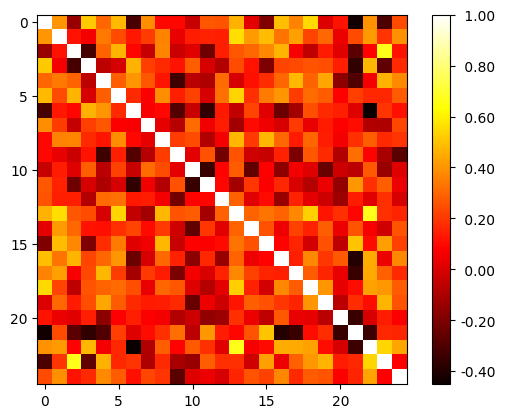

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix_df, cmap='hot', interpolation='nearest')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')

### Identify the top 5 neighbors 

In [27]:
def top_neighbors(user_id, n=5):
    return pl.concat(
        [pl.DataFrame({"user": corr_matrix_df.columns}), corr_matrix_df], how="horizontal"
    ).select(pl.col("user"), pl.col(user_id)).sort(user_id, descending=True).head(n + 1) # top n + self-correlation

In [31]:
top_neighbors("3867")

user,3867
str,f64
"""3867""",1.0
"""2492""",0.476683
"""3853""",0.46411
"""2486""",0.438992
"""3712""",0.400275
"""2288""",0.379856


In [29]:
top_neighbors("89")

user,89
str,f64
"""89""",1.0
"""4809""",0.668516
"""5136""",0.562449
"""860""",0.539066
"""5062""",0.52599
"""3525""",0.475495


### Compute the predictions for each movie for users 3867 and 89